In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl
from plot_functions import *
from importlib import reload  
import sys
sys.path.append("/home/mlparker/programs/python_modules/plotting_functions/")
from step_plots import *
from matplotlib.ticker import *


C1='#D81B60'
C2='#1E88E5'
C3='#FFC107'
C4='#135247'
colors=[C1,C2,C3,C4]

In [42]:
def mutoi(mu):
    i=  np.arccos(mu)/2/np.pi*360
    return i

In [43]:
datafile="simulated_spectra_2/xmm_hybrid/fits_relxill_3to10.dat"
data=pd.read_csv(datafile)

data["i"]=mutoi(data["mu"])
data["delta_a"]=data["fit_a"]-data["a"]
data["delta_i"]=data["fit_i"]-data["i"]
# data["delta_h"]=data["fit_h"]-data["h"]
data["delta_A"]=data["fit_Afe"]-data["Afe"]
data['redchi']=data['chi2']/data['dof']

# highspin_data=data[data["a"]==0.98]
# print

# big_a_diff=data[abs(data['delta_a'])>0.5]
# print(big_a_diff[['fit_a','a']])
print(data.shape[0])

clean_data=data[data['redchi']<1.5]
dirty_data=data[data['redchi']>2]
print(clean_data.shape[0],dirty_data.shape[0])

1000
714 150


0.20304971334592758


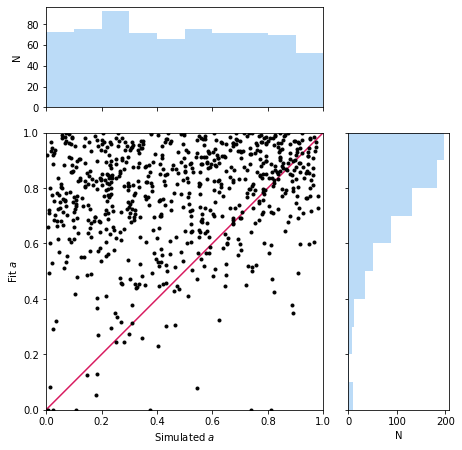

In [44]:
spin_plot(clean_data)
print(clean_data.corr()['a']['fit_a'])
pl.savefig('figures/param_recovery/xmmhybrid_ref_a.pdf',bbox_inches='tight')

0.5030694988627553


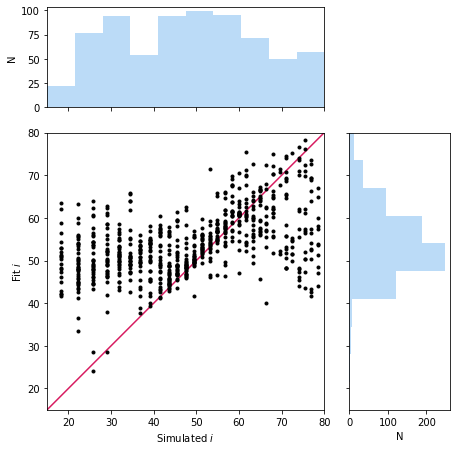

In [45]:
inc_plot(clean_data)
print(clean_data.corr()['i']['fit_i'])
pl.savefig('figures/param_recovery/xmmhybrid_ref_i.pdf',bbox_inches='tight')

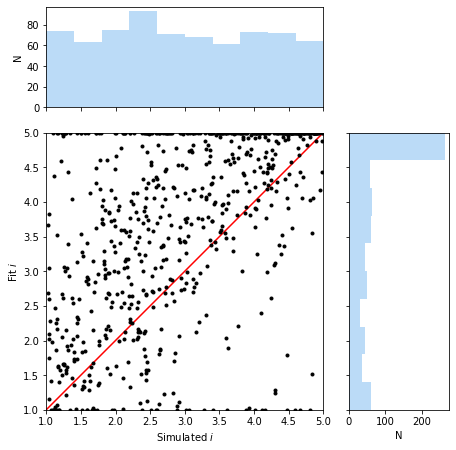

In [46]:
Afe_plot(clean_data)
clean_data.corr()['Afe']['fit_Afe']
pl.savefig('figures/param_recovery/xmmhybrid_ref_Afe.pdf',bbox_inches='tight')


### Sample clean data, plot 10 spectra

In [47]:
clean_sample=clean_data.sample(8)

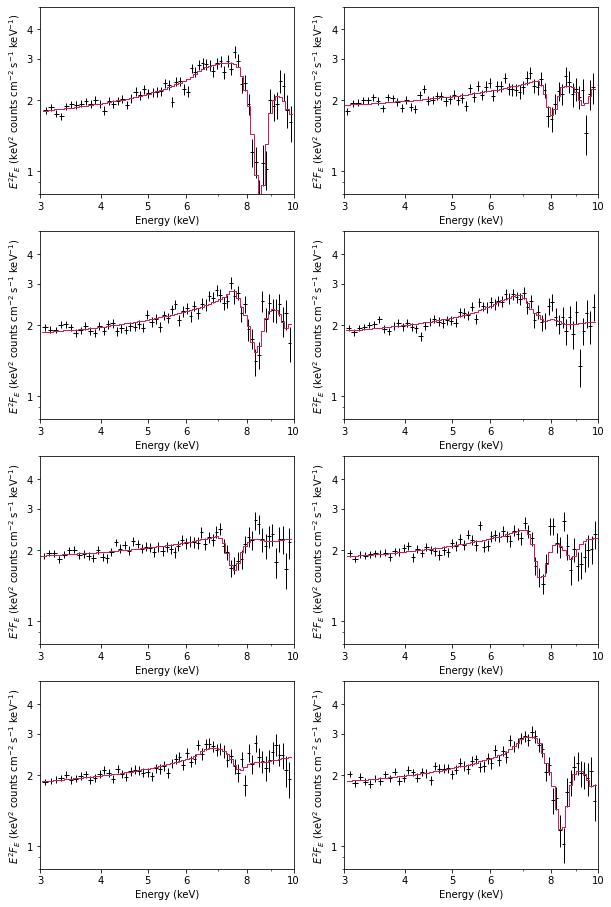

In [57]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,i in enumerate(clean_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.8,5)
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,3,4]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/xmm_hybrid/spectrum_%s.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*fscale*spectrum['x']**escale,\
                spectrum['yerr']*fscale*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1)
    
    step_plot(spectrum['x'],\
              spectrum['model']*fscale*spectrum['x']**escale,\
              spectrum['xerr'],\
              color=C1,lw=1)
    
pl.savefig('figures/spectra/clean_spectra.pdf',bbox_inches='tight')

In [62]:
dirty_sample=dirty_data.sample(8)
print(dirty_sample.columns)

Index(['filename', 'a', 'R', 'Afe', 'mdot', 'fv', 'lx', 'gamma', 'mu', 'fit_a',
       'fit_h', 'fit_Afe', 'fit_gamma', 'fit_i', 'chi2', 'dof', 'i', 'delta_a',
       'delta_i', 'delta_A', 'redchi'],
      dtype='object')


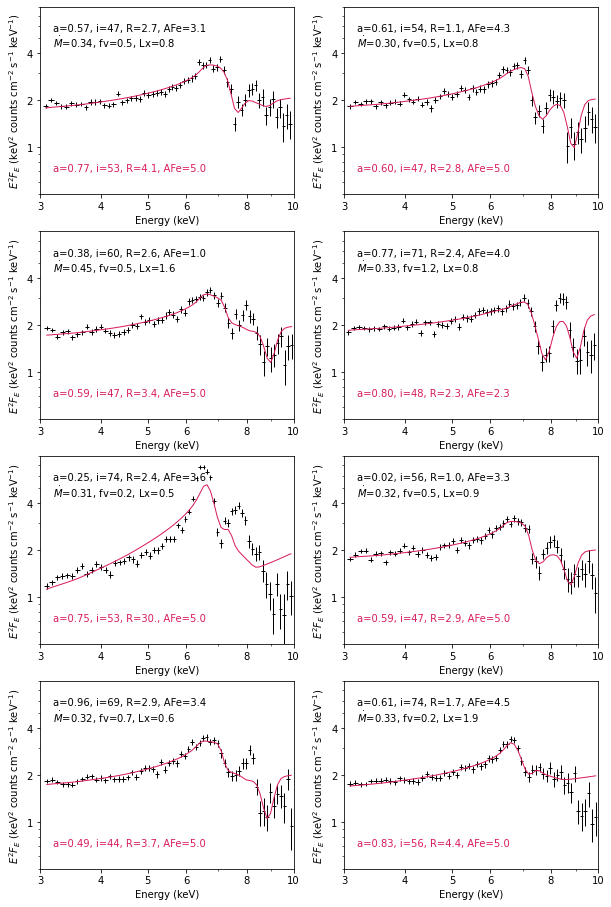

In [73]:
fig=pl.figure(figsize=(10,20),facecolor='w')
escale=2
fscale=1000

for j,fname in enumerate(dirty_sample["filename"]):
# for j,i in enumerate(dirty_sample.index):
#     print(520+j+1)
    ax=pl.subplot(520+j+1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(3,10)
    ax.set_ylim(0.5,8)
    
    i=fname.split('_')[1]
    
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(ScalarFormatter())
    ax.xaxis.set_major_locator(FixedLocator([3,4,5,6,8,10]))
    ax.tick_params(which='minor',labelbottom=False)
    ax.set_xlabel('Energy (keV)')
    
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_major_locator(FixedLocator([1,2,4]))
    ax.tick_params(which='minor',labelleft=False)
    ax.set_ylabel(r"$E^2 F_E$ (keV$^2$ counts cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")
    
    spectrum=pd.read_csv('simulated_spectra_2/xmm_hybrid/spectrum_%s.csv' % str(i))
    
    pl.errorbar(spectrum['x'],\
                spectrum['y']*fscale*spectrum['x']**escale,\
                spectrum['yerr']*fscale*spectrum['x']**escale,\
                spectrum['xerr'],\
                ls='none',color='k',lw=1)
    
    pl.plot(spectrum['x'],\
              spectrum['model']*fscale*spectrum['x']**escale,\
              # spectrum['xerr'],\
              color=C1,lw=1)
    
    
    a=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_a'])))
    R=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_h'])))
    AFe=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_Afe'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fit_i'])))
    ref_pars='a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.12,ref_pars,transform=ax.transAxes,color=C1)
    
    a=(float((dirty_sample.loc[dirty_sample['filename']==fname]['a'])))
    R=(float((dirty_sample.loc[dirty_sample['filename']==fname]['R'])))
    AFe=(float((dirty_sample.loc[dirty_sample['filename']==fname]['Afe'])))
    inc=(float((dirty_sample.loc[dirty_sample['filename']==fname]['i'])))
    ref_pars=r'a=%s, i=%s, R=%s, AFe=%s' % (str(a)[:4], str(inc)[:2],str(R)[:3],str(AFe)[:3]) 
    ax.text(0.05,0.87,ref_pars,transform=ax.transAxes,color='k')
    
    
    mdot=(float((dirty_sample.loc[dirty_sample['filename']==fname]['mdot'])))
    fv=(float((dirty_sample.loc[dirty_sample['filename']==fname]['fv'])))
    Lx=(float((dirty_sample.loc[dirty_sample['filename']==fname]['lx'])))
    dw_pars=r'$\dot{M}$=%s, fv=%s, Lx=%s' % (str(mdot)[:4], str(fv)[:3],str(Lx)[:3])
    ax.text(0.05,0.78,dw_pars,transform=ax.transAxes,color='k')
    
    
pl.savefig('figures/spectra/dirty_spectra.pdf',bbox_inches='tight')

### Iterate through columns of DF, for each plot histogram of distribution for clean and dirty samples

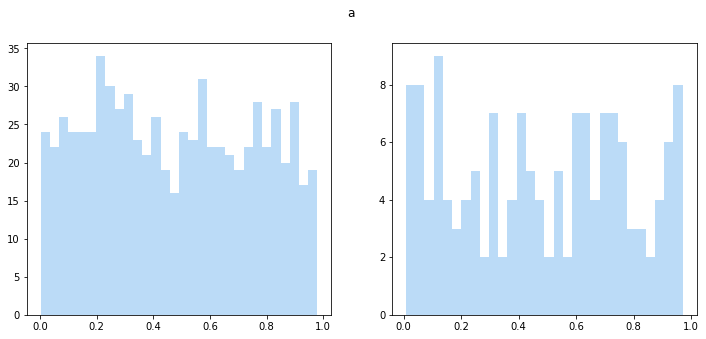

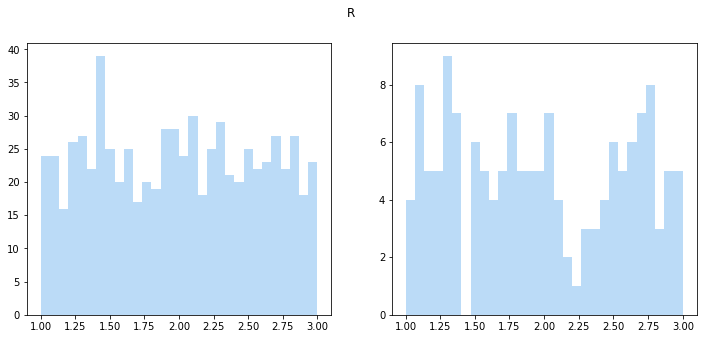

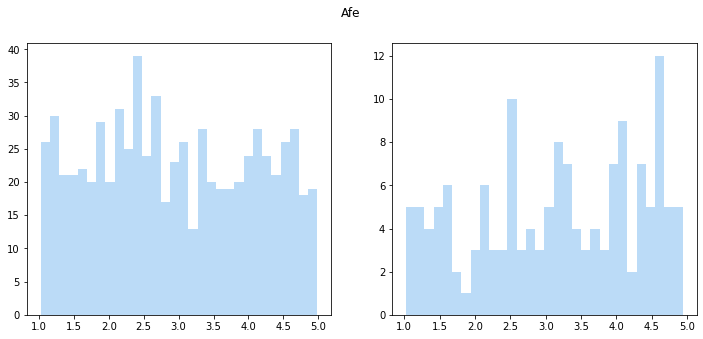

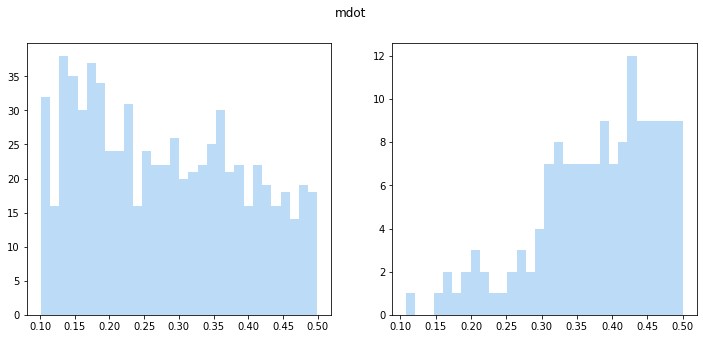

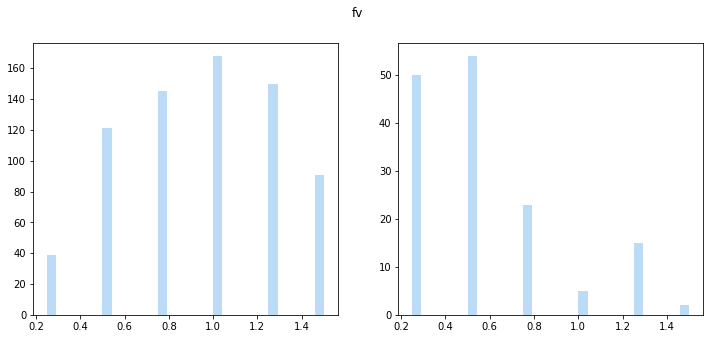

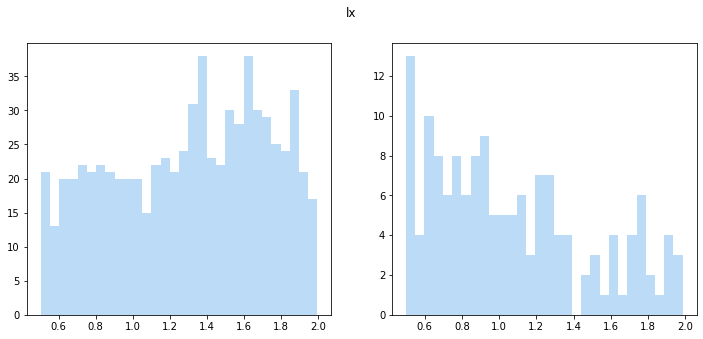

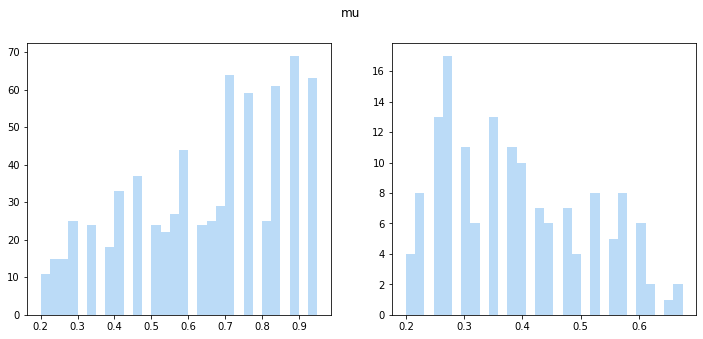

In [12]:
for c in ['a','R','Afe','mdot','fv','lx','mu']:
    fig=pl.figure(figsize=(12,5),facecolor='w')
    fig.suptitle(c)
    ax1=pl.subplot(121)
    h1=pl.hist(clean_data[c],bins=30,color=C2,alpha=0.3)
    ax2=pl.subplot(122)
    h2=pl.hist(dirty_data[c],bins=30,color=C2,alpha=0.3)
    
    

### Find overlap between reflection and disk wind fits

In [13]:
dw_datafile="simulated_spectra_2/xmm_hybrid/fits_dw_3to10.dat"
dw_data=pd.read_csv(dw_datafile)

dw_data['redchi']=dw_data['chi2']/dw_data['dof']

clean_dw_data=dw_data[dw_data['redchi']<1.5]
dirty_dw_data=dw_data[dw_data['redchi']>2]

overlap = pd.merge(clean_dw_data, clean_data, how='inner', on=['filename'])
print(overlap.shape[0])

bad_overlap=pd.merge(dirty_dw_data, dirty_data, how='inner', on=['filename'])
print(bad_overlap.shape[0])

print(overlap)

420
9
                               filename       a_x       R_x     Afe_x  \
0      fakespec_5_xmm_hybrid_binned.pha  0.348418  2.189037  3.225445   
1      fakespec_9_xmm_hybrid_binned.pha  0.498624  2.480826  2.540814   
2     fakespec_13_xmm_hybrid_binned.pha  0.429603  2.080489  1.187469   
3     fakespec_14_xmm_hybrid_binned.pha  0.556355  1.121542  3.487726   
4     fakespec_18_xmm_hybrid_binned.pha  0.100076  2.289951  2.433214   
..                                  ...       ...       ...       ...   
415  fakespec_989_xmm_hybrid_binned.pha  0.683177  1.569635  2.467770   
416  fakespec_990_xmm_hybrid_binned.pha  0.500021  2.503194  3.582043   
417  fakespec_992_xmm_hybrid_binned.pha  0.674218  1.048767  3.447530   
418  fakespec_995_xmm_hybrid_binned.pha  0.775583  1.998901  1.607348   
419  fakespec_998_xmm_hybrid_binned.pha  0.812553  1.420562  2.378052   

       mdot_x  fv_x      lx_x  gamma_x   mu_x  fit_mdot  ...   fit_Afe  \
0    0.200460  1.50  1.703929      2.0  0.4